In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
df_raw = pd.read_csv('King_County_House_prices_dataset.csv')
df_raw['Mprice'] = df_raw.price/1e6

In [19]:
def plotMaxMeanMin(df_p):
    keys = [zipcode for zipcode, df in df_p.groupby(['condition'])]
    keys = [str(z) for z in keys]
    plt.bar(keys,df_p.groupby(['condition']).max()['Mprice'])
    plt.bar(keys,df_p.groupby(['condition']).mean()['Mprice'])
    plt.bar(keys,df_p.groupby(['condition']).min()['Mprice'])
    plt.ylabel('max/mean/min price in USD (M$)')
    plt.xlabel('condition')
    plt.xticks(keys, rotation='vertical', size=10)
    plt.show()

In [4]:
df_raw.condition.unique()

array([3, 5, 4, 1, 2])

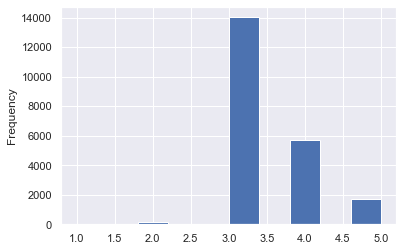

In [5]:
df_raw.condition.plot.hist()

In [8]:
df_raw.groupby('condition').max()

condition
1    1500000.0
2    2560000.0
3    7060000.0
4    7700000.0
5    3650000.0
Name: price, dtype: float64

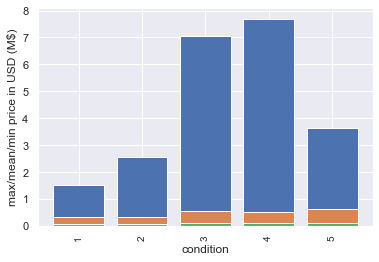

In [20]:
plotMaxMeanMin(df_raw)

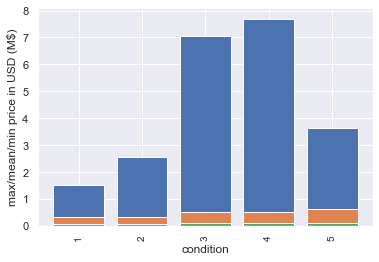

In [23]:
plotMaxMeanMin(df_raw[df_raw.yr_built < 2000])

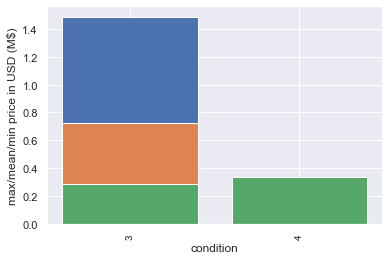

In [34]:
plotMaxMeanMin(df_raw[(df_raw.yr_renovated > 2014) & (df_raw.yr_built < 1970)])

### Grade and Condtion

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


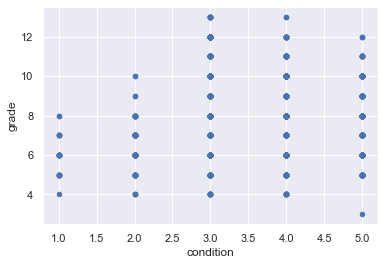

In [37]:
df_raw.plot.scatter(x = 'condition', y= 'grade')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


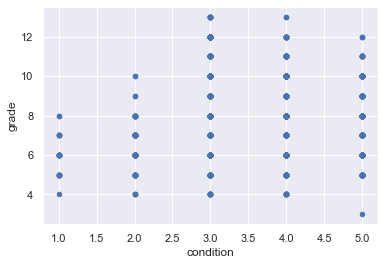

In [57]:
df_raw.plot.scatter(x = 'condition', y= 'grade')

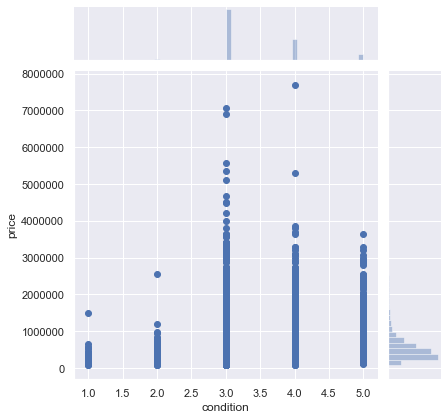

In [39]:
sns.jointplot(x='condition',y='price',data=df_raw,kind='scatter')

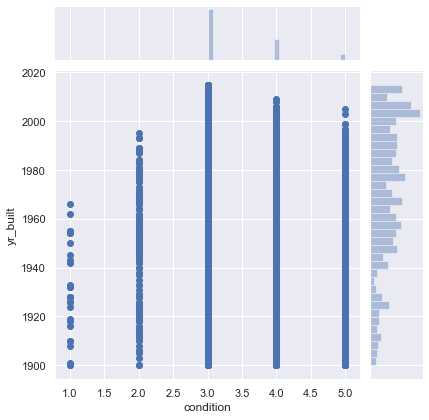

In [41]:
sns.jointplot(x='condition',y='yr_built',data=df_raw,kind='scatter')

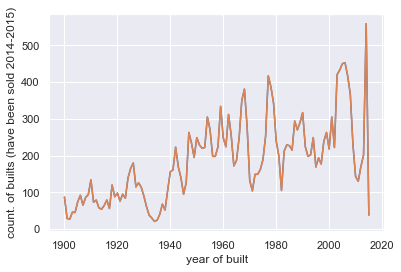

In [47]:
gr_yrbuild = df_raw.groupby('yr_built')
keys = [x for x, df in gr_yrbuild]
plt.plot(keys,gr_yrbuild.count()['price'])
plt.xlabel('year of built')
plt.ylabel('count. of builts (have been sold 2014-2015)')
plt.show()

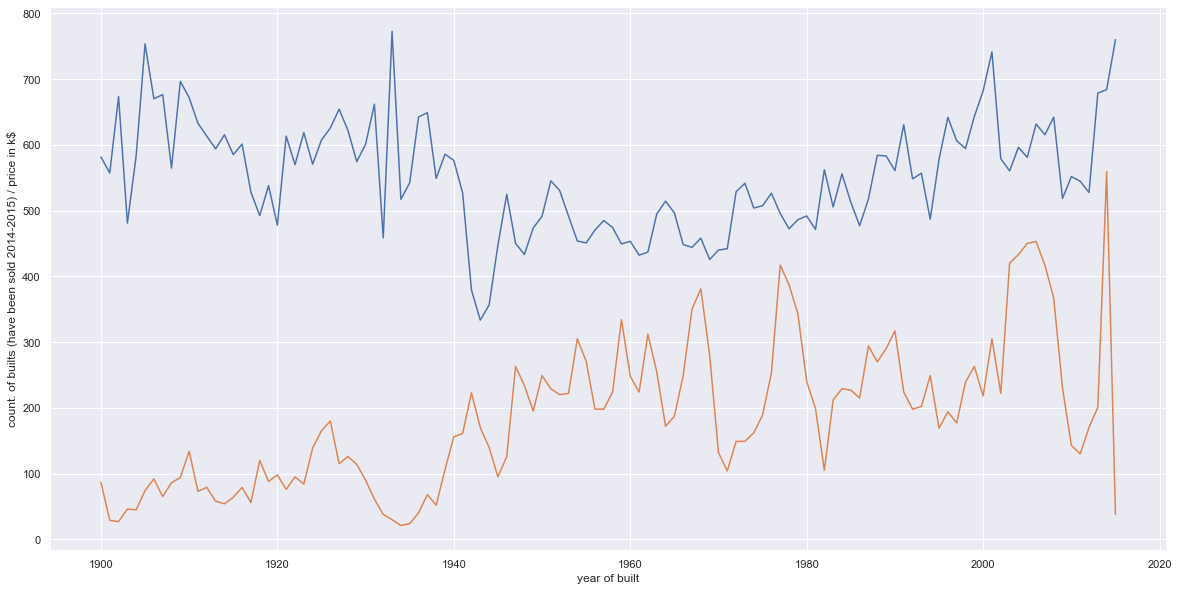

In [56]:
gr_yrbuild = df_raw.groupby('yr_built')
keys = [x for x, df in gr_yrbuild]
plt.figure(figsize=(20,10))
plt.plot(keys,gr_yrbuild.mean()['price']/1000)

plt.xlabel('year of built')
plt.ylabel('count. of builts (have been sold 2014-2015) / price in k$')
plt.plot(keys,gr_yrbuild.count()['price'])
plt.show()

In [ ]:

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# renovted 

In [62]:
print
df_raw[df_raw.yr_renovated.isnull()].shape

(3842, 22)

In [65]:
df_raw[df_raw.yr_renovated > 0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Mprice
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.538
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,0.696
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,0.905
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,1.090
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,1.450
